# PrimeKG Case Study — Hurler Syndrome

This notebook reproduces a **drug repurposing and disease exploration example** from the PrimeKG paper, focusing on the rare disease **Hurler syndrome (Mucopolysaccharidosis type I, severe form)**.

It mirrors the Autism notebook workflow but adapted for Hurler syndrome:

- Load **PrimeKG (kg.csv)**.
- Filter Hurler syndrome–related disease labels (using MONDO / Orphanet IDs).
- Summarize **Drug–Disease** associations (e.g., Enzyme Replacement Therapy with Laronidase, Hematopoietic Stem Cell Transplantation).
- Collect connected **phenotypes, proteins, pathways, exposures**.
- Build and visualize a **subgraph** centered on Hurler syndrome.
- Explore **candidate drugs** via shared protein targets and pathways.

---

In [1]:
# --- Parameters ---
KG_PATH = "kg.csv"   # Path to PrimeKG giant component CSV
KEYWORD = "Hurler syndrome"   # Disease of interest
EGO_RADIUS = 2
MAX_EDGES = 500_000

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import time

pd.set_option("display.max_colwidth", 120)

def t0():
    s = time.time()
    return lambda: f"{time.time()-s:,.1f}s"

print("[INFO] Imports ready.")
timer = t0()

[INFO] Imports ready.


In [2]:
print("[INFO] Loading PrimeKG...")
kg = pd.read_csv(KG_PATH)
print(kg.head())
print("[INFO] Done loading:", timer())

[INFO] Loading PrimeKG...


/tmp/ipykernel_53211/3916772075.py:2: DtypeWarning: Columns (3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  kg = pd.read_csv(KG_PATH)


          relation display_relation  x_index  x_id        x_type  x_name  \
0  protein_protein              ppi        0  9796  gene/protein  PHYHIP   
1  protein_protein              ppi        1  7918  gene/protein  GPANK1   
2  protein_protein              ppi        2  8233  gene/protein   ZRSR2   
3  protein_protein              ppi        3  4899  gene/protein    NRF1   
4  protein_protein              ppi        4  5297  gene/protein   PI4KA   

  x_source  y_index   y_id        y_type  y_name y_source  
0     NCBI     8889  56992  gene/protein   KIF15     NCBI  
1     NCBI     2798   9240  gene/protein   PNMA1     NCBI  
2     NCBI     5646  23548  gene/protein   TTC33     NCBI  
3     NCBI    11592  11253  gene/protein  MAN1B1     NCBI  
4     NCBI     2122   8601  gene/protein   RGS20     NCBI  
[INFO] Done loading: 9.7s


In [3]:
# Filter rows where either side of the edge mentions Hurler syndrome
kw = KEYWORD.lower()
hurler_rows = kg[
    (kg['x_name'].str.lower().str.contains(kw, na=False)) |
    (kg['y_name'].str.lower().str.contains(kw, na=False))
]
print(f"[INFO] Found {len(hurler_rows)} edges involving {KEYWORD}.")
hurler_rows.head(10)

[INFO] Found 188 edges involving Hurler syndrome.


,relation,display_relation,x_index,x_id,x_type,x_name,x_source,y_index,y_id,y_type,y_name,y_source
389110,indication,indication,20647,DB00090,drug,Laronidase,DrugBank,28579,11758,disease,Hurler syndrome,MONDO
3097765,disease_phenotype_positive,phenotype present,28579,11758,disease,Hurler syndrome,MONDO,24291,2344,effect/phenotype,Progressive neurologic deterioration,HPO
3097766,disease_phenotype_positive,phenotype present,28579,11758,disease,Hurler syndrome,MONDO,22373,7957,effect/phenotype,Corneal opacity,HPO
3097767,disease_phenotype_positive,phenotype present,28579,11758,disease,Hurler syndrome,MONDO,22355,7759,effect/phenotype,Opacification of the corneal stroma,HPO
3097768,disease_phenotype_positive,phenotype present,28579,11758,disease,Hurler syndrome,MONDO,22304,365,effect/phenotype,Hearing impairment,HPO
3097769,disease_phenotype_positive,phenotype present,28579,11758,disease,Hurler syndrome,MONDO,85437,3311,effect/phenotype,Hypoplasia of the odontoid process,HPO
3097770,disease_phenotype_positive,phenotype present,28579,11758,disease,Hurler syndrome,MONDO,22488,4322,effect/phenotype,Short stature,HPO
3097771,disease_phenotype_positive,phenotype present,28579,11758,disease,Hurler syndrome,MONDO,23236,1371,effect/phenotype,Flexion contracture,HPO
3097772,disease_phenotype_positive,phenotype present,28579,11758,disease,Hurler syndrome,MONDO,22282,280,effect/phenotype,Coarse facial features,HPO
3097773,disease_phenotype_positive,phenotype present,28579,11758,disease,Hurler syndrome,MONDO,23151,2180,effect/phenotype,Neurodegeneration,HPO


In [4]:
# Build ego-subgraph around Hurler syndrome
G = nx.from_pandas_edgelist(kg, source="x_name", target="y_name", edge_attr=True)

if KEYWORD in G:
    H = nx.ego_graph(G, KEYWORD, radius=EGO_RADIUS)
    print(f"[INFO] Subgraph size: {len(H.nodes)} nodes, {len(H.edges)} edges.")
else:
    print("[WARN] Disease node not found in KG. Check disease naming (MONDO/Orphanet IDs).")

[INFO] Subgraph size: 6831 nodes, 159944 edges.


In [5]:
# Summarize node types connected to Hurler syndrome
node_types = defaultdict(int)
for n, data in H.nodes(data=True):
    if isinstance(n, str):
        node_types[n.split()[0]] += 1

print("[INFO] Node type distribution in subgraph:")
for k,v in node_types.items():
    print(f"  {k}: {v}")

[INFO] Node type distribution in subgraph:
  Norfloxacin: 1
  Prader-Willi-like: 2
  DDIT4: 1
  intellectual: 71
  obsolete: 15
  Synovial: 1
  Pentoxifylline: 1
  Nepafenac: 1
  early-onset: 12
  spinocerebellar: 4
  ring: 10
  ATG5: 1
  caudal: 2
  persistent: 3
  agenesis: 4
  granulomatous: 4
  trisomy: 15
  myotonic: 2
  Zolpidem: 1
  connective: 3
  Ito: 1
  Menkes: 1
  X-linked: 73
  Bietti: 1
  Proportionate: 1
  chromosome: 57
  Cortical: 1
  Emery-Nelson: 1
  Hepatitis: 1
  methemoglobinemia: 2
  congenital: 125
  muscular: 14
  THRA: 1
  cleft: 22
  neurodevelopmental: 69
  aromatic: 1
  Becker: 2
  hyperuricemia,: 1
  calcific: 1
  Abnormal: 61
  KLF11: 1
  Dandy-Walker: 2
  even-plus: 1
  Nedocromil: 1
  scimitar: 1
  hawkinsinuria: 1
  Heyn-Sproul-Jackson: 1
  distal: 25
  Ruvalcaba: 1
  curved: 1
  Tietze: 1
  common: 1
  diffuse: 6
  Ehlers-Danlos: 17
  macrothrombocytopenia-lymphedema-developmental: 1
  Coxa: 1
  Rifapentine: 1
  Kleefstra: 3
  Diamond-Blackfan: 2
  L1

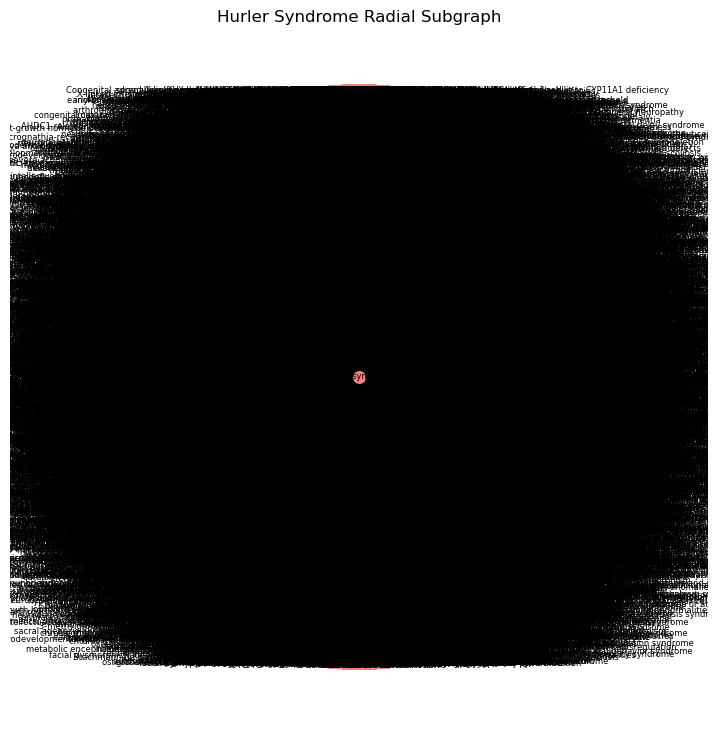

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(9,9))
# Put the main disease node in the center
center_node = "Hurler syndrome"
pos = nx.shell_layout(H, nlist=[[center_node], list(set(H.nodes())-{center_node})])

nx.draw_networkx_nodes(H, pos, node_size=70, node_color="lightcoral")
nx.draw_networkx_edges(H, pos, alpha=0.3)
nx.draw_networkx_labels(H, pos, font_size=6)
plt.title("Hurler Syndrome Radial Subgraph")
plt.axis("off")
plt.show()


In [7]:
# Extract drug connections
drug_edges = hurler_rows[hurler_rows['y_type'].str.contains("drug", case=False, na=False)]
if len(drug_edges) == 0:
    drug_edges = hurler_rows[hurler_rows['x_type'].str.contains("drug", case=False, na=False)]

print("[INFO] Drug associations for Hurler syndrome:")
drug_edges[['x_name','y_name','relation']].drop_duplicates().head(20)

[INFO] Drug associations for Hurler syndrome:


,x_name,y_name,relation
5775910,Hurler syndrome,Laronidase,indication
